# Assignment 2B - Multiclass Classification using DNN
**Classification using Deep Neural Network**:
<br> Multiclass Classification using Deep Neural Networks: Example - Use the OCR letter recognition dataset https://archive.ics.uci.edu/ml/datasets/letter+recognition

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# load the dataset
df = pd.read_csv('letter_recognition.data',  header=None, sep = ",")

In [4]:
# view
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


### Preprocessing

In [5]:
# assign column names (optional)
df.columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar',
              'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege',
              'xegvy', 'y-ege', 'yegvx']

In [6]:
df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
# separate features and target
x = df.drop('letter', axis=1)
y = df['letter']

### Encoding

In [8]:
# encode the letter labels (A-Z) into integers (0-25)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
# one-hot encoding
y_categorical = to_categorical(y_encoded)

### Split & Standardize

In [10]:
# split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2, random_state=42)

In [11]:
# scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Build & Train DNN

In [12]:
model = Sequential()

# 3 layers
model.add(Dense(128, input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 output neurons - one for each letter

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 26)                1690      
                                                                 
Total params: 12,122
Trainable params: 12,122
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train the model
history = model.fit(
    x_train, y_train,
    epochs = 50,
    batch_size = 32,
    validation_split = 0.1,
    verbose = 1)

Epoch 1/50
450/450 [==============================] - 1s 2ms/step - loss: 1.4705 - accuracy: 0.6022 - val_loss: 0.8607 - val_accuracy: 0.7431
Epoch 2/50
450/450 [==============================] - 1s 1ms/step - loss: 0.7039 - accuracy: 0.7930 - val_loss: 0.6005 - val_accuracy: 0.8288
Epoch 3/50
450/450 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.8453 - val_loss: 0.4806 - val_accuracy: 0.8531
Epoch 4/50
450/450 [==============================] - 1s 1ms/step - loss: 0.4273 - accuracy: 0.8741 - val_loss: 0.3950 - val_accuracy: 0.8844
Epoch 5/50
450/450 [==============================] - 1s 1ms/step - loss: 0.3612 - accuracy: 0.8924 - val_loss: 0.3731 - val_accuracy: 0.8763
Epoch 6/50
450/450 [==============================] - 1s 1ms/step - loss: 0.3122 - accuracy: 0.9077 - val_loss: 0.3358 - val_accuracy: 0.8975
Epoch 7/50
450/450 [==============================] - 1s 1ms/step - loss: 0.2750 - accuracy: 0.9170 - val_loss: 0.2842 - val_accuracy: 0.9081
Epoch 

### Evaluation & Prediction

In [14]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 1)
print('Test Accuracy: ', test_accuracy)
print('Test Loss: ', test_loss)

125/125 [==============================] - 0s 1ms/step - loss: 0.1614 - accuracy: 0.9555
Test Accuracy:  0.9555000066757202
Test Loss:  0.1614076942205429


In [15]:
# get predictions
y_pred = model.predict(x_test)

# convert one-hot predictions back to label indices
pred_indices = np.argmax(y_pred, axis=1)
true_indices = np.argmax(y_test, axis=1)

# convert label indices back to actual letters
pred_labels = label_encoder.inverse_transform(pred_indices)
true_labels = label_encoder.inverse_transform(true_indices)

125/125 [==============================] - 0s 1ms/step


In [16]:
# predictions vs actual
print('Predictions vs. Actual')
for i in range(5):
    print('Predicted: ', pred_labels[i], ' | Actual: ', true_labels[i])

Predictions vs. Actual
Predicted:  X  | Actual:  T
Predicted:  L  | Actual:  L
Predicted:  A  | Actual:  A
Predicted:  E  | Actual:  E
Predicted:  Q  | Actual:  Q


### Plot

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

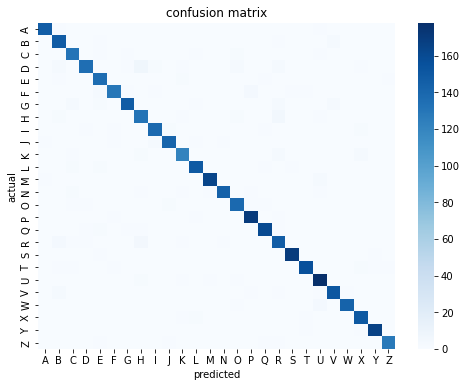

In [18]:
# compute confusion matrix
cm = confusion_matrix(true_indices, pred_indices)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

In [28]:
# precision, recall, f1-score for each class
report = classification_report(true_indices, pred_indices, target_names=label_encoder.classes_)
print("\nClassification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       149
           B       0.90      0.96      0.93       153
           C       0.97      0.93      0.95       137
           D       0.95      0.95      0.95       156
           E       0.88      0.96      0.92       141
           F       0.94      0.94      0.94       140
           G       0.87      0.96      0.91       160
           H       0.93      0.90      0.91       144
           I       0.99      0.92      0.95       146
           J       0.95      0.99      0.97       149
           K       0.92      0.92      0.92       130
           L       0.96      0.98      0.97       155
           M       0.97      0.96      0.97       168
           N       0.99      0.92      0.95       151
           O       0.98      0.94      0.96       145
           P       0.98      0.96      0.97       173
           Q       0.96      0.98      0.97       166
  